In [1]:
import scanpy as sc
import os
import pandas as pd

In [2]:
# Load data
adata = sc.read_10x_h5('../data/filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
print(adata)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 10836 × 32738
    var: 'gene_ids', 'feature_types', 'genome'


In [3]:
# Load Antibody Clusters
htodemux = pd.read_csv('../data/HTOclusters.csv', index_col=0)
print(htodemux)
adata.obs['Sample'] = htodemux['Cluster']

                                    Cluster
Barcode                                    
AAACCCAAGAAACACT-1  anti-Human_Hashtag-0255
AAACCCAAGATACTGA-1  anti-Human_Hashtag-0254
AAACCCAAGATGAACT-1  anti-Human_Hashtag-0255
AAACCCAAGCGTCAGA-1  anti-Human_Hashtag-0253
AAACCCAAGGATGAGA-1  anti-Human_Hashtag-0252
...                                     ...
TTTGTTGGTCCCGCAA-1  anti-Human_Hashtag-0254
TTTGTTGGTGTTAACC-1                  Doublet
TTTGTTGTCAATCTTC-1  anti-Human_Hashtag-0254
TTTGTTGTCCAGTGTA-1  anti-Human_Hashtag-0252
TTTGTTGTCCCAATAG-1  anti-Human_Hashtag-0252

[10836 rows x 1 columns]


In [4]:
# Use antibody cluster to remove doublets and negative droplets
adata = adata[~adata.obs['Sample'].isin(['Doublet', 'Negative'])]
print(adata)

View of AnnData object with n_obs × n_vars = 8488 × 32738
    obs: 'Sample'
    var: 'gene_ids', 'feature_types', 'genome'


/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


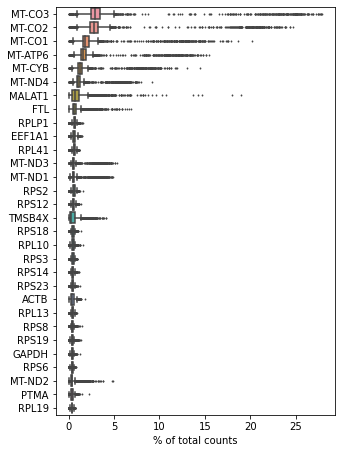

In [5]:
# Inspect most highly expressed genes
sc.pl.highest_expr_genes(adata, n_top=30)

In [6]:
# Annotate mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [7]:
# Quality control metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'Sample' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical
/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


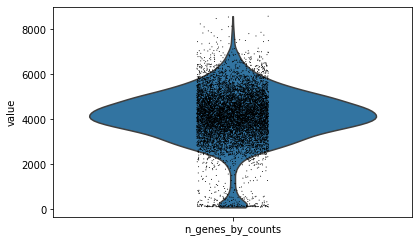

/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


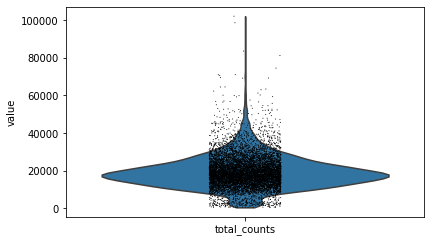

/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


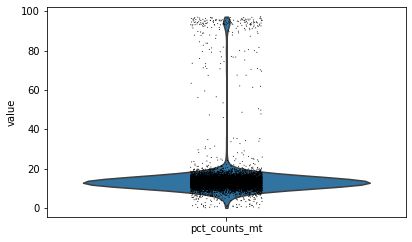

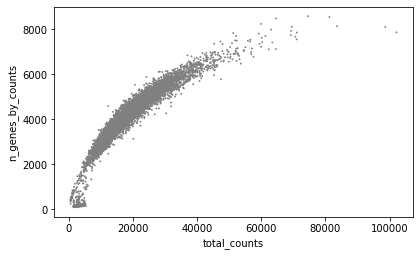

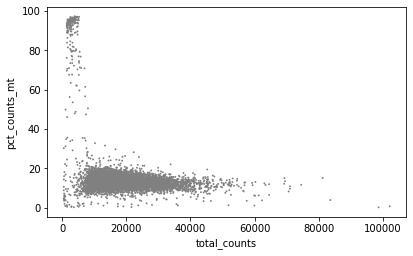

In [8]:
# Plot violin plots of quality control metrics
sc.pl.violin(adata, ['n_genes_by_counts'])
sc.pl.violin(adata, ['total_counts'])
sc.pl.violin(adata, ['pct_counts_mt'])
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [9]:
# Filter cells based on counts - remove suspected doublets and empty droplets
adata = adata[(adata.obs['total_counts'] > 6200) & (adata.obs['total_counts'] < 36000)]

/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


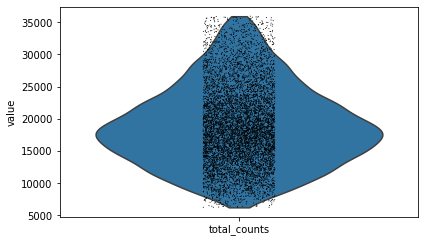

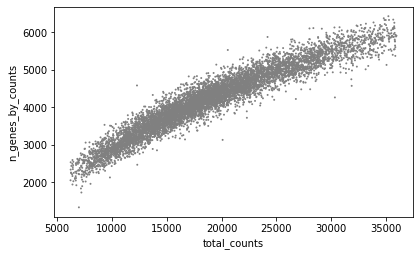

In [10]:
# View metrics after filtering
sc.pl.violin(adata, ['total_counts'])
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

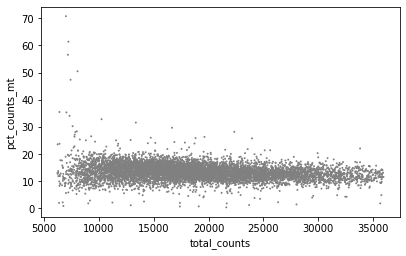

In [11]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [12]:
# Filter dead cells based on mitochondrial counts
adata = adata[adata.obs['pct_counts_mt'] < 19]

/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


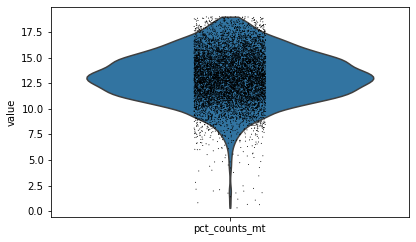

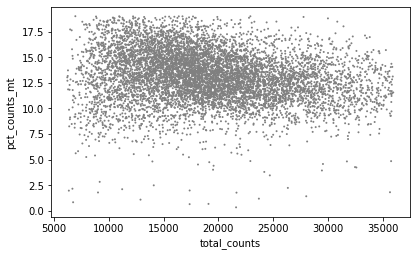

In [13]:
sc.pl.violin(adata, ['pct_counts_mt'])
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')

In [14]:
# Further cell filtering
adata = adata[(adata.obs['n_genes_by_counts'] < 6000) & (adata.obs['n_genes_by_counts'] > 2200)]

/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


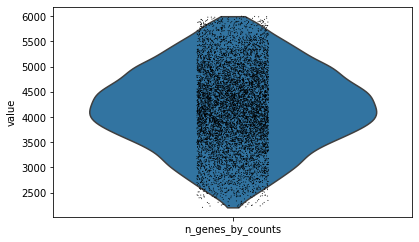

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts'])

In [16]:
# Filter genes that are expressed in few cells
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.var` of view, copying.
/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


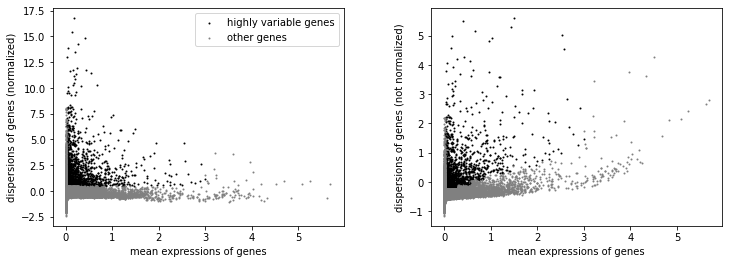

In [17]:
# Normalization, highly variable genes calculation, and inspection
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [18]:
# Note: the line below can be uncommented if you want to shrink the dataset to only highly variable genes
# adata = adata[:, adata.var.highly_variable]

In [19]:
adata.raw = adata

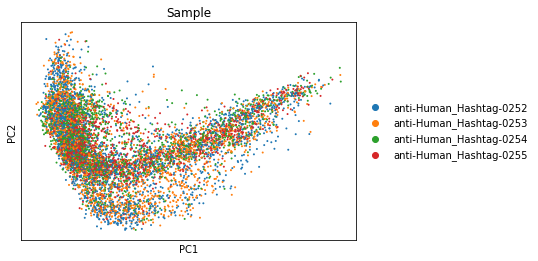

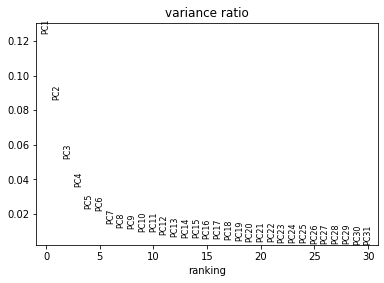

In [20]:
# Compute PCA - number of components will be 50
sc.pp.pca(adata, n_comps=None,
          zero_center=True, svd_solver='arpack',
          random_state=0, return_info=False,
          use_highly_variable=None, # Uses all highly variable genes by default
          dtype='float32', copy=False, chunked=False, chunk_size=None)
sc.pl.pca(adata, color=['Sample'])
sc.pl.pca_variance_ratio(adata)

In [21]:
# Use 40 PCs based on data size, not noisy dataset
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [22]:
# Compute UMAP
sc.tl.umap(adata)

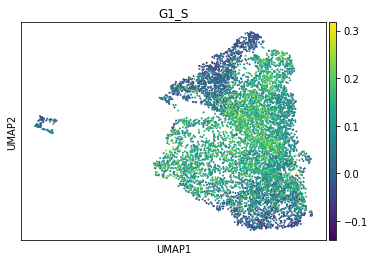

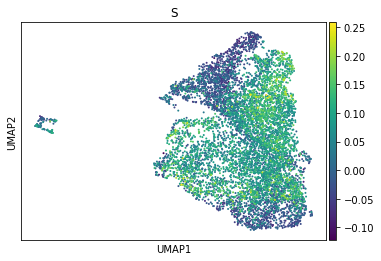

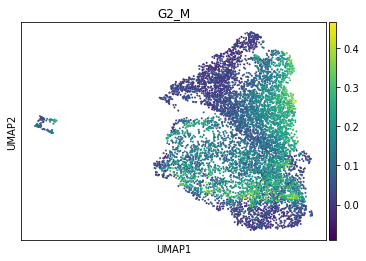

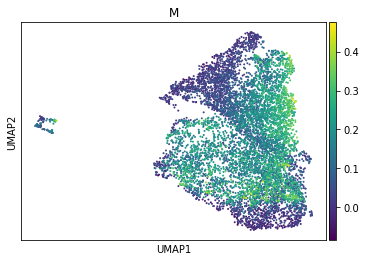

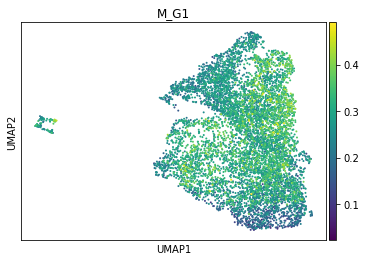

In [23]:
# Annotate Cell Cycle
cc_genes = pd.read_excel('../data/cc-associated-genes.xlsx')
cc_state_genes = {}
for cc in list(cc_genes.columns):
    cc_state_genes[cc] = [x for x in list(filter(lambda x: (isinstance(x, str)), list(cc_genes[cc])))
                         if x in adata.var_names]
    sc.tl.score_genes(adata, gene_list=cc_state_genes[cc], score_name=cc)
    sc.pl.umap(adata, color=[cc], save=cc+'.png')

In [24]:
# Write data
#adata.write_h5ad('../data/20210706_Preprocessed-IncreasedDepth.h5ad')

In [25]:
# Regress out cell cycle
sc.pp.regress_out(adata, keys=['G2_M', 'G1_S'], n_jobs=1)

Recompute graphs below

/home/matt/anaconda3/envs/scrna/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2492: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


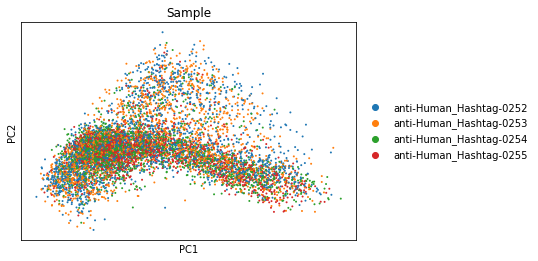

In [26]:
sc.tl.pca(adata)
sc.pl.pca(adata, color=['Sample'])

In [27]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [28]:
sc.tl.umap(adata)

In [29]:
# Write cell cycle regression data
#adata.write_h5ad('../data/20210706_Preprocessed_CellCycle_Regressed_IncreasedDepth.h5ad', as_dense=['X'])